In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 
from sklearn.feature_selection import RFE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from vecstack import stacking


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
os.chdir(r'C:\Users\pavi\Desktop\Python 3\data')

In [4]:
abalone=pd.read_csv("abalone_dataset.csv")

In [5]:
abalone.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here, we are going to predict the abalone gender, it has been divided into 3 groups (ie) Female, Male and Infant, also considered to be multiclassification problem. we have some features to analyse that given abalone belongs to which group

In [6]:
abalone.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
abalone['sex'].value_counts()/len(abalone)

M    0.365813
I    0.321283
F    0.312904
Name: sex, dtype: float64

Moreover, we have equal number of samples in each gender.

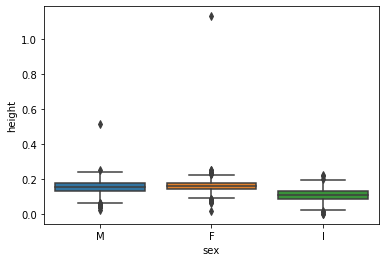

In [8]:
sns.boxplot(abalone.sex,abalone.height)

On an average both the male and female abalone have same height.
Height of infant is below the avg of both male and female and the spread is equally distributed.

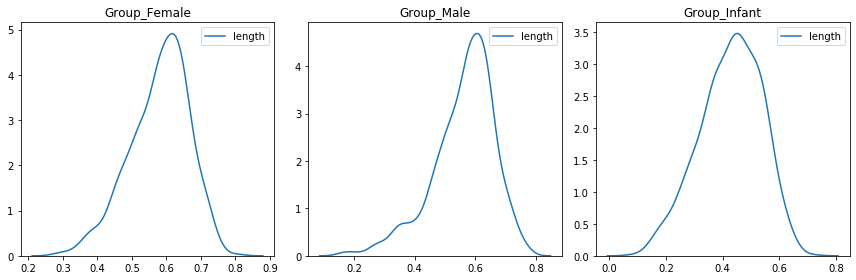

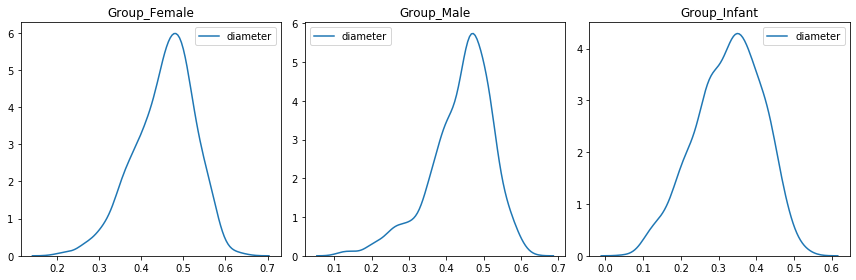

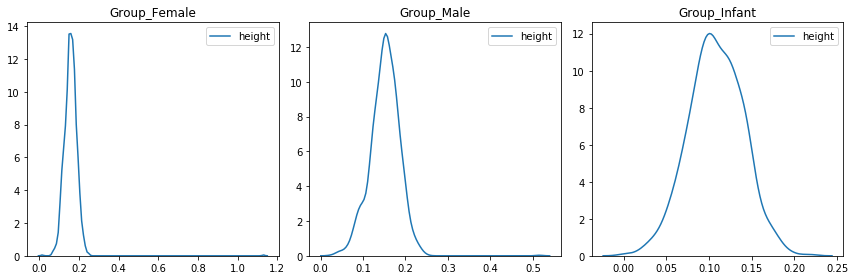

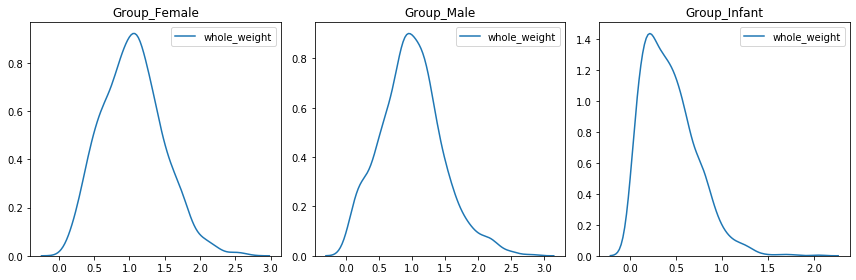

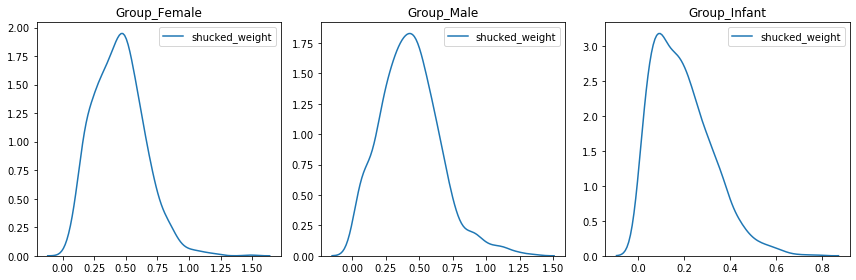

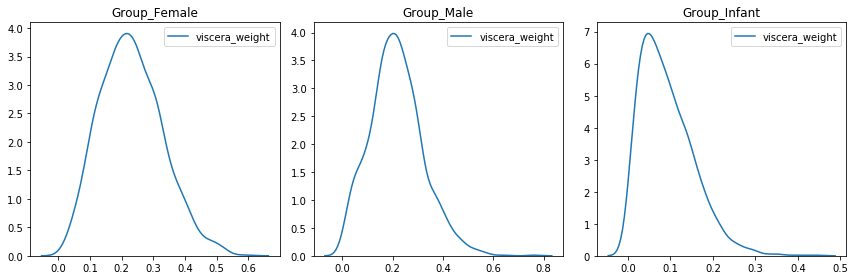

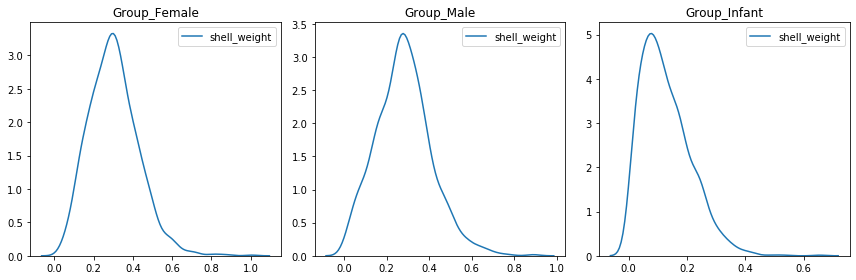

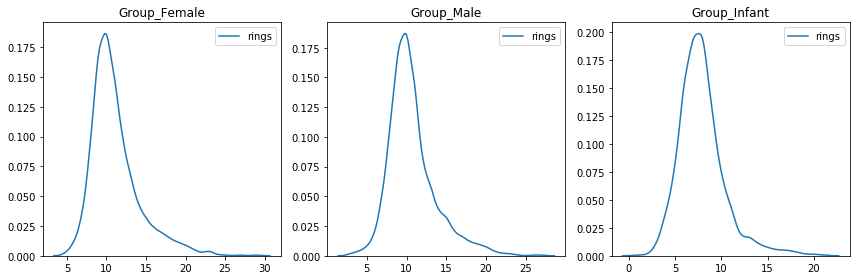

In [9]:
abalone_sex=abalone.groupby('sex')
cols=list(abalone.columns)
cols.remove('sex')
for i in cols:
    abalone_sex_0=abalone_sex.get_group('F')
    abalone_sex_1=abalone_sex.get_group('M')
    abalone_sex_2=abalone_sex.get_group('I')
    fig,(ax1,ax2,ax3)=plt.subplots(ncols=3,figsize=(12,4))
    ax1.set_title("Group_Female")
    sns.kdeplot(abalone_sex_0[i],ax=ax1)
    ax2.set_title("Group_Male")
    sns.kdeplot(abalone_sex_1[i],ax=ax2)
    ax3.set_title("Group_Infant")
    sns.kdeplot(abalone_sex_2[i],ax=ax3)
    plt.tight_layout()
    
#Checked the distribution of data in groupwise. Skewness presence 

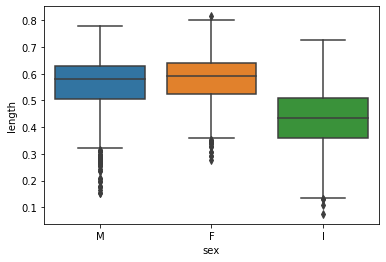

In [10]:
sns.boxplot(abalone.sex,abalone.length)

On an average length of male and female abalone is ranged between 0.55 and 0.60.
On an average length of infant abalone is ranged between 0.40 and 0.50

In [11]:
data=abalone.copy()
data['sex'].replace({'F':0,'M':1,'I':2},inplace=True)

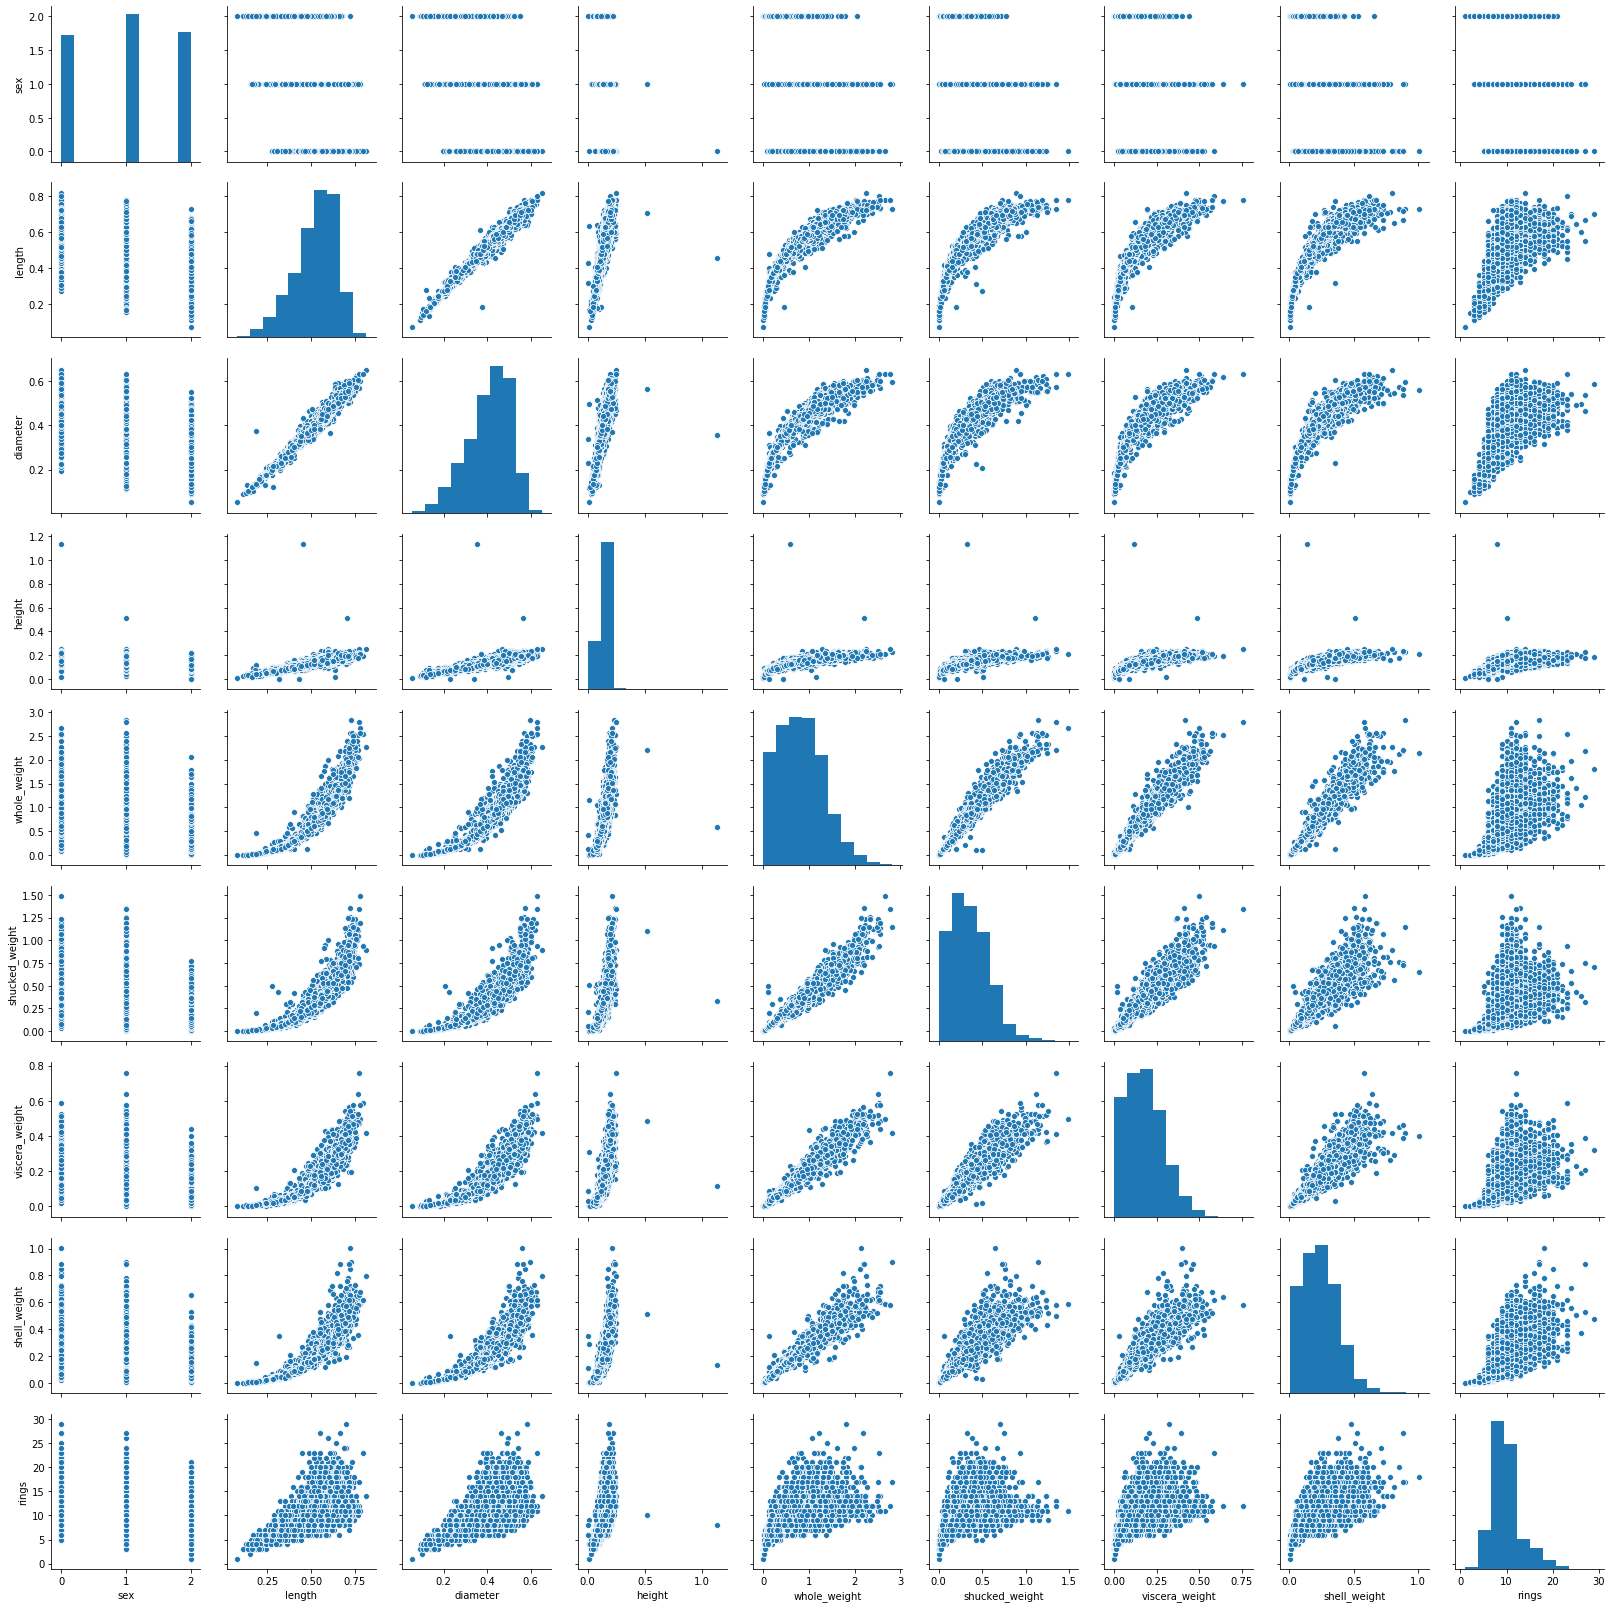

In [12]:
sns.pairplot(data)
# Multicollinearity exists between all independent variables. Homoscedasticity pattern exists between rings and other variable

In [13]:
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
data.isnull().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [15]:
data.corr()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
sex,1.000000,-0.503697,-0.516450,-0.477850,-0.501511,-0.459731,-0.505693,-0.499103,-0.401445
length,-0.503697,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
diameter,-0.516450,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
height,-0.477850,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
whole_weight,-0.501511,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
shucked_weight,-0.459731,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
viscera_weight,-0.505693,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
shell_weight,-0.499103,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
rings,-0.401445,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# Base Model - Logistic Regression

In [41]:
y=data['sex']
X=data.drop('sex', axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [43]:
sc=StandardScaler()
sc.fit(X,y)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [44]:
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred=classifier.predict(X_test)

In [46]:
cm=metrics.confusion_matrix(y_pred,y_test)
print("confusion_matrix: ", cm)

confusion_matrix:  [[133 127  28]
 [185 208  45]
 [ 68 110 350]]


In [47]:
metrics.accuracy_score(y_pred,y_test)

0.55103668261563

In [48]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.34      0.46      0.39       288
           1       0.47      0.47      0.47       438
           2       0.83      0.66      0.74       528

    accuracy                           0.55      1254
   macro avg       0.55      0.53      0.53      1254
weighted avg       0.59      0.55      0.57      1254



In [49]:
y=data['sex']
X=data.drop('sex', axis=1)

In [50]:
sc=StandardScaler()
X_train=sc.fit_transform(X)

In [51]:
from sklearn import model_selection
results=[]
model=LogisticRegression()
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_train,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))


0.533156 0.000051


In [37]:
import statsmodels.api as sm

In [52]:
Xc=sm.add_constant(X)
model=sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sex   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     223.2
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          8.28e-316
Time:                        19:21:36   Log-Likelihood:                -4230.9
No. Observations:                4177   AIC:                             8480.
Df Residuals:                    4168   BIC:                             8537.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4395      0.082     29.704      0.000       2.278       2.600
length             1.9501      0.549      3.553      0.000       0.874       3.026
diameter          -4.0857      0.676     -6.047      0.000      -5.410      -2.761
height            -1.8072      0.469     -3.855      0.000      -2.726      -0.888
whole_weight      -0.1959      0.225     -0.873      0.383      -0.636       0.244
shucked_weight     0.6555      0.265      2.475      0.013       0.136       1.175
viscera_weight    -2.2425      0.395     -5.679      0.000      -3.017      -1.468
shell_weight       0.5396      0.344      1.568      0.117      -0.135       1.214
rings             -0.0334      0.005     -7.163      0.000      -0.042      -0.024
==============================================================================
Omnibus:                      378.639   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.399
Skew:                          -0.247   Prob(JB):                     1.33e-33
Kurtosis:                       2.209   Cond. No.                         869.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
cols=list(X.columns)
pmax=1

while(len(cols)>0):
    p=[]
    x=X[cols]
    xc=sm.add_constant(x)
    model=sm.OLS(y,xc).fit()
    
    p=pd.Series(model.pvalues.values[1:],index=cols)
    pmax=max(p)
    features=p.idxmax()
    if pmax>0.05:
        cols.remove(features)
    else:
        break
        
selected_features=cols
print(selected_features)

['length', 'diameter', 'height', 'shucked_weight', 'viscera_weight', 'rings']


In [54]:
y=data['sex']
X=data.drop(['sex','whole_weight','shell_weight'], axis=1)

In [55]:
sc=StandardScaler()

X_train=sc.fit_transform(X)

In [56]:
from sklearn import model_selection
results=[]
model=LogisticRegression()
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_train,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))


0.535748 0.000066


In [57]:
from sklearn.decomposition import PCA

In [58]:
y=data['sex']
X=data.drop('sex',axis=1)

In [59]:
X_scaled=pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [60]:
pca1=PCA(n_components=5)
pca1.fit_transform(X_scaled)
print(pca1.explained_variance_ratio_)

[0.83905489 0.08695162 0.03230539 0.02074873 0.01061871]


In [71]:
pd.DataFrame(pca1.components_,columns=X_scaled.columns,
            index=['PC-1','PC-2','PC-3','PC-4','PC-5'])

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
PC-1,0.372139,0.373094,0.340027,0.378307,0.362454,0.368558,0.370758,0.242713
PC-2,-0.068283,-0.040048,0.070463,-0.137346,-0.298840,-0.172979,0.045400,0.921204
PC-3,0.031070,0.041005,0.899706,-0.206194,-0.208286,-0.197380,-0.161574,-0.192144
PC-4,-0.604054,-0.587595,0.256777,0.241849,0.183246,0.265221,0.244192,0.043310
PC-5,-0.011125,0.057911,-0.056729,0.015656,-0.398525,-0.309821,0.830564,-0.220026


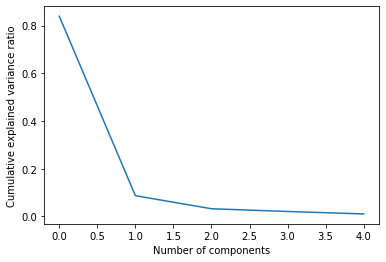

In [61]:
plt.plot(pca1.explained_variance_ratio_)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

In [62]:
pca2=PCA(n_components=2)
x_pca=pca2.fit_transform(X_scaled)

In [63]:
results=[]
model=LogisticRegression()
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,x_pca,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))

0.491889 0.000183


# Recursive feature elimination

In [72]:
y=data['sex']
X=data.drop('sex',axis=1)


In [73]:
model=LogisticRegression()
rfe=RFE(model, 5)

X_rfe=rfe.fit_transform(X, y)
model.fit(X_rfe, y)

print(list(X.columns))
print(rfe.support_)
print(rfe.ranking_)

['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
[ True  True False  True  True  True False False]
[1 1 2 1 1 1 3 4]


In [74]:
y=data['sex']
X=data.drop(['sex','shell_weight', 'rings','height'],axis=1)

sc=StandardScaler()
X_train=sc.fit_transform(X)

results=[]
model=LogisticRegression()
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_train,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))

0.531472 0.000160


# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [76]:
y=data['sex']
X=data.drop('sex',axis=1)

In [77]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)


In [79]:
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='f1_weighted')
GS.fit(X_scaled,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [80]:
GS.best_params_

{'n_neighbors': 28, 'weights': 'uniform'}

In [82]:
model=KNeighborsClassifier(n_neighbors=28,weights='uniform')
result=[]
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_scaled,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))

0.544324 0.000124


# Decision Tree

In [84]:
dt=DecisionTreeClassifier(random_state=0)
param={'criterion':['entropy','gini']}
GS=GridSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_scaled,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [85]:
GS.best_params_

{'criterion': 'gini'}

In [86]:
model=DecisionTreeClassifier(criterion='gini',random_state=0)
result=[]
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_scaled,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))

0.497511 0.000377


# Randomforest

In [88]:
RF=RandomForestClassifier()
RF_var=[]
for val in np.arange(1,50):
    RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(RF,X_scaled,y,cv=kfold,scoring='f1_weighted')
    RF_var.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))


1 0.00021133799811697503
2 0.0002567603324392283
3 0.0001918421711014771
4 0.0002410154266113713
5 0.0002019298474233602
6 0.0001501055418739965
7 0.00023953714642432203
8 5.732097474618863e-05
9 0.00011368034328204665
10 0.0001395037686414522
11 0.0004522403678819553
12 0.00046883350356984526
13 0.0002919167627444607
14 0.00022973526645872039
15 0.000339414296510277
16 0.00038881282150424873
17 0.0002831175516732947
18 0.00015498682166048354
19 0.0002475543878077387
20 0.0002413884942737601
21 0.00018053959407686416
22 0.0001966520495581002
23 0.0001951439652252591
24 0.00029630759560478413
25 0.0002569848571810397
26 0.0004239281890941929
27 0.00030748361659650985
28 0.0003523937684883406
29 0.00029910020166872356
30 0.00023641498781235633
31 0.00028154029102141643
32 0.0003258545458140557
33 0.0002916252546353205
34 0.00024513502096868225
35 0.00026776626204108426
36 0.0001497914834247759
37 0.00016228779076678913
38 0.00012881390101394493
39 0.00015285049203092306
40 0.000312024253

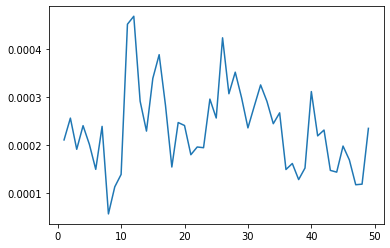

In [90]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

In [91]:
model=RandomForestClassifier(n_estimators=12,criterion='gini',random_state=0)
result=[]
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_scaled,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))

0.533238 0.000469


# All models

In [94]:
Bag_var=[]
for val in np.arange(1,50):
    Bag=BaggingClassifier(n_estimators=val,random_state=0)
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(Bag,X_scaled,y,cv=kfold,scoring='f1_weighted')
    Bag_var.append(np.var(cv_results,ddof=1))
    print(val,np.var(cv_results,ddof=1))

1 0.0005593831634455293
2 0.0006762730821411541
3 0.0010028830804578981
4 0.00029650418470796047
5 0.0005624685170645617
6 0.0001772073210626238
7 0.00016269867421283733
8 0.00021261700812916467
9 0.0001367997993298342
10 0.0001226184876660688
11 0.00019517084952446482
12 0.0001799881700356672
13 5.505109663792774e-05
14 0.00010574534376778126
15 0.0001297465346011508
16 0.00034974396790233826
17 0.0002881396086585161
18 0.0003365605840933208
19 0.00019398717568374477
20 0.0001321059068535618
21 0.00013500491807366292
22 0.0001455659285628918
23 0.00028135543297399515
24 0.0001619198822471159
25 0.0003153159770766794
26 0.000399744329465605
27 0.000326390075005242
28 0.00046415896491871415
29 0.0003491325410668702
30 0.0004511251668834685
31 0.0006642564152870843
32 0.0007782516271127684
33 0.0007720832913951827
34 0.0008292875447915253
35 0.00046598492748382793
36 0.0005511856695058053
37 0.00035071103997856746
38 0.00042675092090525824
39 0.00035709500402494
40 0.00042454838300391235

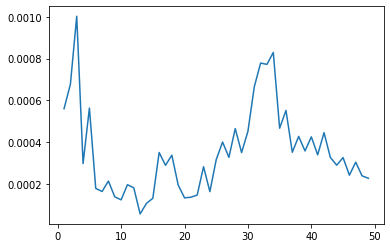

In [96]:
x_axis=np.arange(1,50)
plt.plot(x_axis,Bag_var)

In [109]:
Bost=[]
for val in np.arange(1,50):
    Boost1=AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=val,random_state=0)
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(Boost1,X_scaled,y,cv=kfold,scoring='f1_weighted')
    Bost.append(np.mean(cv_results))
    print(val,np.mean(cv_results))

1 0.506460998901972
2 0.503994511384386
3 0.5042607666917648
4 0.5071255818473136
5 0.5091336769569992
6 0.513348650423905
7 0.5166713356994159
8 0.5198053038949494
9 0.5230170692079401
10 0.5242649348070944
11 0.5263693908151613
12 0.5283131297556115
13 0.5275248067288745
14 0.5253534396351482
15 0.5248058074408454
16 0.5274269732507532
17 0.5315946165518683
18 0.5310068222722948
19 0.5317841277846105
20 0.5335120101513166
21 0.5350072301953289
22 0.536971170817035
23 0.5376681330817693
24 0.5400988671289672
25 0.5408896079328319
26 0.5409194979933222
27 0.5399083263239522
28 0.5413692288096245
29 0.5432586923965316
30 0.5427634470691779
31 0.5437355960773047
32 0.5431170533279264
33 0.5428250313690545
34 0.5434971403161661
35 0.5438045289373464
36 0.5449060095984143
37 0.5451526570248296
38 0.5457787596367116
39 0.5454492714609617
40 0.5446259369728753
41 0.5450078579711706
42 0.5445894669554336
43 0.5440853115366447
44 0.5434819043933999
45 0.5431568312870544
46 0.5441782860403902
4

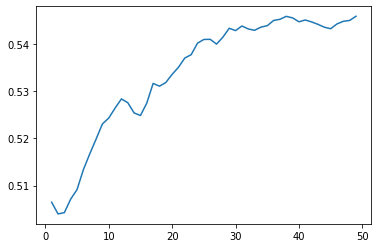

In [110]:
x_axis=np.arange(1,50)
plt.plot(x_axis,Bost)

In [111]:
GB_bias=[]
for val in np.arange(1,200):
    GB1=GradientBoostingClassifier(n_estimators=val)
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(GB1,X_scaled,y,cv=kfold,scoring='f1_weighted')
    GB_bias.append(np.mean(cv_results))
    print(val,np.mean(cv_results))

1 0.43223159080036405
2 0.4508178638928008
3 0.4626805103998173
4 0.4775195472796691
5 0.507307658671431
6 0.5202063494459769
7 0.5322190147131826
8 0.5364360166514434
9 0.5358988143069056
10 0.538376102005068
11 0.5394144908608157
12 0.5374918064385358
13 0.5444574406179762
14 0.5450388898846035
15 0.5445782824712134
16 0.5463802404284336
17 0.5432719572754418
18 0.542488076030021
19 0.5440139662974423
20 0.5440088412989704
21 0.5445226933029075
22 0.5455394781069087
23 0.5486596663495648
24 0.5489085150451772
25 0.5483022202161432
26 0.5472168082324522
27 0.546580165442155
28 0.5448436224559309
29 0.5448457205079171
30 0.545985944809633
31 0.5475541249186899
32 0.5455363176293416
33 0.5446677363788165
34 0.545084911288633
35 0.5445695762182826
36 0.5446786296192209
37 0.5463562563926089
38 0.5481295965212429
39 0.5474989029418315
40 0.5490433568671563
41 0.5494394450864684
42 0.5485121370520439
43 0.5484370903782337
44 0.5463639562275384
45 0.5472739453372351
46 0.5488876461512144
47

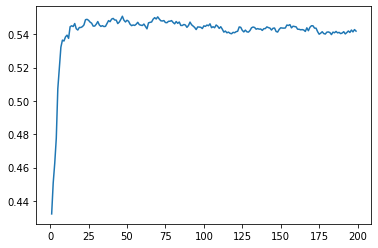

In [112]:
x_axis=np.arange(1,200)
plt.plot(x_axis,GB_bias)

In [108]:
y=data['sex']
X=data.drop(['sex'],axis=1)

X_scaled=sc.fit_transform(X)

In [114]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=28,weights='uniform')
DT=DecisionTreeClassifier(criterion='gini',random_state=0)
RF=RandomForestClassifier(criterion='gini',n_estimators=12,random_state=0)
Bag=BaggingClassifier(n_estimators=13,random_state=0)
BostLR=AdaBoostClassifier(base_estimator=LR,n_estimators=38,random_state=0)
GB=GradientBoostingClassifier(n_estimators=24)
stacked=VotingClassifier(estimators=[('Logistic',LR),('RandomForest',RF),('Gradient Boosting',GB)],voting='soft')

models=[]
models.append(('Logistic',LR))
models.append(('NaiveBayes',NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RF',RF))
models.append(('Bagging', Bag))
models.append(('Adabost',BostLR))
models.append(('GBoost',GB))
models.append(('Stacked',stacked))

results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(model,X_scaled,y,cv=kfold,scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s %f %f" %(name, np.mean(cv_results),np.var(cv_results,ddof=1)))

Logistic 0.533156 0.000051
NaiveBayes 0.476387 0.001041
KNN 0.544324 0.000124
DT 0.497511 0.000377
RF 0.533238 0.000469
Bagging 0.537504 0.000055
Adabost 0.545779 0.000080
GBoost 0.549125 0.000062
Stacked 0.537902 0.000107


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
pd.DataFrame({'vif':vif}, index=X.columns)

,vif
length,697.318095
diameter,755.011900
height,43.001976
whole_weight,435.902914
shucked_weight,117.390128
viscera_weight,64.559856
shell_weight,82.428951
rings,21.580605


In [107]:
y=data['sex']
X=data.drop(['sex','length','diameter','shucked_weight','whole_weight'],axis=1)

X_scaled=sc.fit_transform(X)

model=KNeighborsClassifier(n_neighbors=28,weights='uniform')
result=[]
kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
cv_results=model_selection.cross_val_score(model,X_scaled,y,cv=kfold,scoring='f1_weighted')
results.append(cv_results)
print("%f %f" %(np.mean(cv_results),np.var(cv_results,ddof=1)))

0.535762 0.000170


In [115]:
y=data['sex']
X=data.drop(['sex','length','diameter','shucked_weight','whole_weight'],axis=1)

X_scaled=sc.fit_transform(X)


LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=28,weights='uniform')
DT=DecisionTreeClassifier(criterion='gini',random_state=0)
RF=RandomForestClassifier(criterion='gini',n_estimators=12,random_state=0)
Bag=BaggingClassifier(n_estimators=13,random_state=0)
BostLR=AdaBoostClassifier(base_estimator=LR,n_estimators=38,random_state=0)
GB=GradientBoostingClassifier(n_estimators=24)
stacked=VotingClassifier(estimators=[('Logistic',LR),('RandomForest',RF),('Gradient Boosting',GB)],voting='soft')

models=[]
models.append(('Logistic',LR))
models.append(('NaiveBayes',NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RF',RF))
models.append(('Bagging', Bag))
models.append(('Adabost',BostLR))
models.append(('GBoost',GB))
models.append(('Stacked',stacked))

results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(model,X_scaled,y,cv=kfold,scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s %f %f" %(name, np.mean(cv_results),np.var(cv_results,ddof=1)))

Logistic 0.505607 0.000094
NaiveBayes 0.503847 0.000471
KNN 0.535762 0.000170
DT 0.475513 0.000078
RF 0.508029 0.000085
Bagging 0.511021 0.000072
Adabost 0.525184 0.000026
GBoost 0.533710 0.000130
Stacked 0.526870 0.000005


In [116]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=28,weights='uniform')
DT=DecisionTreeClassifier(criterion='gini',random_state=0)
RF=RandomForestClassifier(criterion='gini',n_estimators=12,random_state=0)
Bag=BaggingClassifier(n_estimators=13,random_state=0)
BostLR=AdaBoostClassifier(base_estimator=LR,n_estimators=38,random_state=0)
GB=GradientBoostingClassifier(n_estimators=24)
stacked=VotingClassifier(estimators=[('Logistic',LR),('RandomForest',RF),('Gradient Boosting',GB)],voting='soft')

models=[]
models.append(('Logistic',LR))
models.append(('NaiveBayes',NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RF',RF))
models.append(('Bagging', Bag))
models.append(('Adabost',BostLR))
models.append(('GBoost',GB))
models.append(('Stacked',stacked))

results=[]
names=[]
for name, model in models:
    kfold=model_selection.KFold(shuffle=True, n_splits=3,random_state=0)
    cv_results=model_selection.cross_val_score(model,x_pca,y,cv=kfold,scoring='f1_weighted')
    results.append(cv_results)
    names.append(name)
    print("%s %f %f" %(name, np.mean(cv_results),np.var(cv_results,ddof=1)))

Logistic 0.491889 0.000183
NaiveBayes 0.497073 0.000179
KNN 0.525619 0.000352
DT 0.476383 0.000081
RF 0.504391 0.000028
Bagging 0.494919 0.000084
Adabost 0.518006 0.000024
GBoost 0.517425 0.000084
Stacked 0.523485 0.000108
